In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [48]:
df=pd.read_csv("../data/clean_dataset.csv")

In [49]:
df.shape

(300153, 12)

In [50]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [51]:
df=df.drop(['flight','Unnamed: 0'],axis=1)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [52]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [53]:
df.nunique()

airline                 6
source_city             6
departure_time          6
stops                   3
arrival_time            6
destination_city        6
class                   2
duration              476
days_left              49
price               12157
dtype: int64

In [80]:
df.duration.describe()

count    300153.000000
mean         12.221021
std           7.191997
min           0.830000
25%           6.830000
50%          11.250000
75%          16.170000
max          49.830000
Name: duration, dtype: float64

In [83]:
df.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

In [55]:
le=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=le.fit_transform(df[i])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


<Axes: >

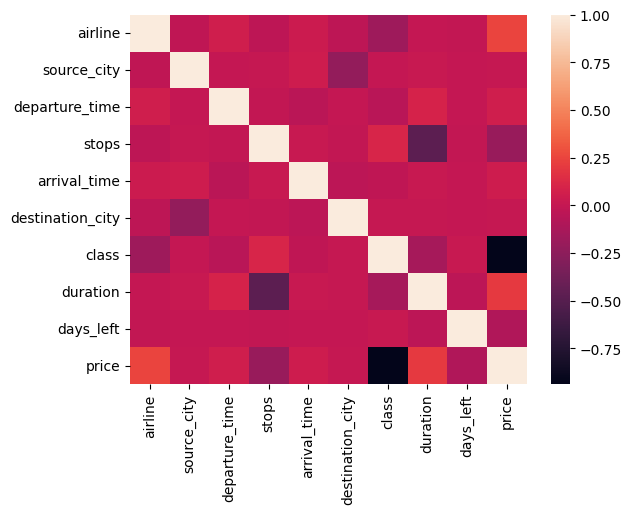

In [56]:
sns.heatmap(df.corr())

In [57]:
df.corr()['price']

airline             0.243358
source_city         0.004594
departure_time      0.058319
stops              -0.202620
arrival_time        0.042043
destination_city    0.004795
class              -0.937860
duration            0.204222
days_left          -0.091949
price               1.000000
Name: price, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [68]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=43)

In [70]:
reg=RandomForestRegressor(n_estimators= 150,max_depth=25)
reg.fit(x_train,y_train)

C:\Users\gkkha\AppData\Local\Temp\ipykernel_6016\968700349.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg.fit(x_train,y_train)


RandomForestRegressor(max_depth=25, n_estimators=150)

In [71]:
prediction=reg.predict(x_test)

In [63]:
r2_score(prediction,y_test)

0.985090262294249

In [64]:
mean_absolute_error(prediction,y_test)

1116.3610638651119

In [65]:
import pickle
pickle.dump(reg,open('f2.sav', 'wb'))

In [66]:
import numpy as np

In [67]:
# input_1=(a.astype(int))
# ip_2=np.asarray(input_1)
# ip_3=ip_2.reshape(1,-1)
# p1=reg.predict(ip_3)
# print(p1)
